In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
# Memuat dataset
file_path = "heart.csv"
df = pd.read_csv(file_path)

In [33]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [34]:
df.tail(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [35]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [36]:
df_noid = df.iloc[:,2:]
df_noid

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,0,145,174,0,1,125,1,2.6,0,0,3,0
3,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,0,110,254,0,0,159,0,0.0,2,0,2,1


In [37]:
df1 = df.sort_values(by='age', ascending=True)
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [38]:
df2 = df.sort_values(by=['trestbps', 'chol'], ascending=[False, True])
df2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
679,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [39]:
df_noid.describe()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
# Menampilkan informasi umum
def data_summary(df):
    print("Informasi Dataset:")
    print(df.info())
    print("\nStatistik Deskriptif:")
    print(df.describe())
    print("\nJumlah Data Per Kategori Target:")
    print(df['target'].value_counts())

data_summary(df)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Statistik Deskriptif:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     

In [41]:
# Statistik Dasar: Mean, Median, Mode
def basic_statistics(df):
    print("\nMean (Rata-rata):\n", df.mean())
    print("\nMedian (Tengah):\n", df.median())
    print("\nMode (Modus):\n", df.mode().iloc[0])
    print("\nStandar Deviasi:\n", df.std())
    print("\nRange:\n", df.max() - df.min())
    print("\nKuartil:\n", df.quantile([0.25, 0.5, 0.75]))

basic_statistics(df)


Mean (Rata-rata):
 age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

Median (Tengah):
 age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Mode (Modus):
 age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        204.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64

Standar Deviasi:
 age          9.072290
sex          0.460373
cp

In [42]:
# Deteksi Outliers menggunakan Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()
print("\nJumlah Outliers Per Kolom:\n", outliers)


Jumlah Outliers Per Kolom:
 age          0
sex          0
cp           0
trestbps     7
chol        13
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca          18
thal         7
target       0
dtype: int64


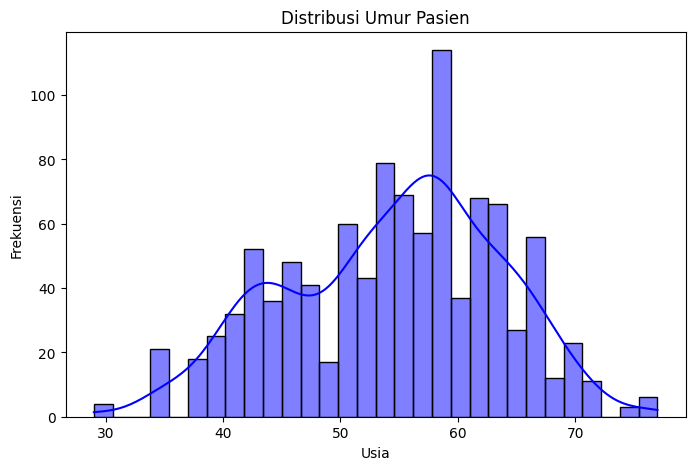

In [43]:
# Visualisasi Distribusi Umur
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Distribusi Umur Pasien")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

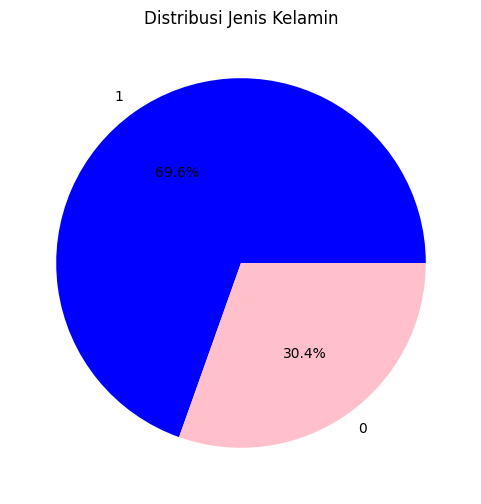

In [44]:
# Pie Chart Jenis Kelamin
plt.figure(figsize=(6,6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title("Distribusi Jenis Kelamin")
plt.ylabel("")
plt.show()

<ipython-input-45-3cc5b8979445>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='pastel')


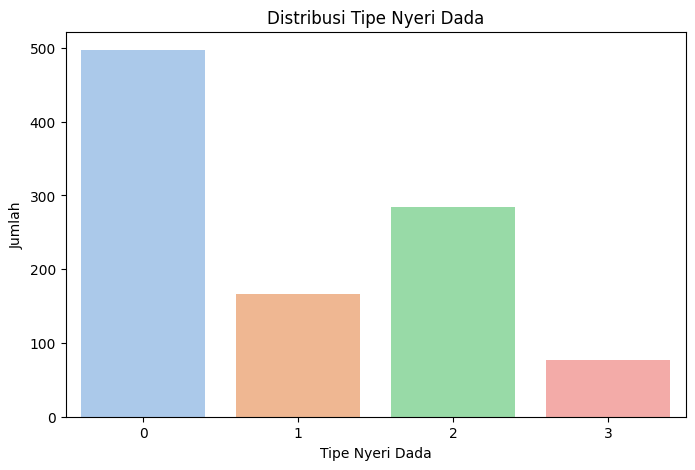

In [45]:
# Bar Chart Nyeri Dada
plt.figure(figsize=(8,5))
sns.countplot(x='cp', data=df, palette='pastel')
plt.title("Distribusi Tipe Nyeri Dada")
plt.xlabel("Tipe Nyeri Dada")
plt.ylabel("Jumlah")
plt.show()

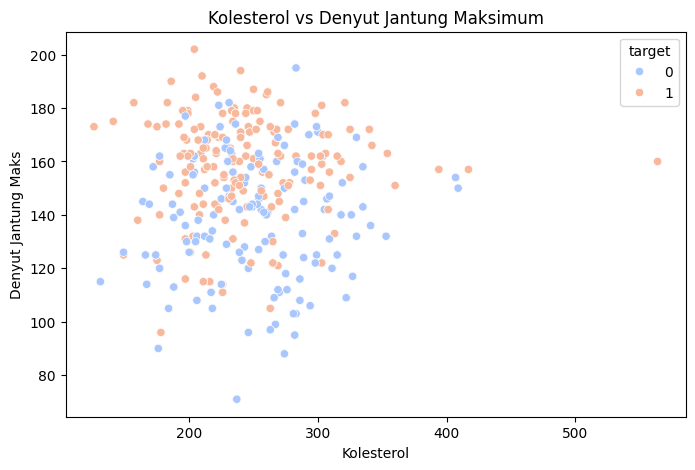

In [46]:
# Scatter Plot: Kolesterol vs Denyut Jantung Maksimum
plt.figure(figsize=(8,5))
sns.scatterplot(x='chol', y='thalach', hue='target', data=df, palette='coolwarm')
plt.title("Kolesterol vs Denyut Jantung Maksimum")
plt.xlabel("Kolesterol")
plt.ylabel("Denyut Jantung Maks")
plt.show()

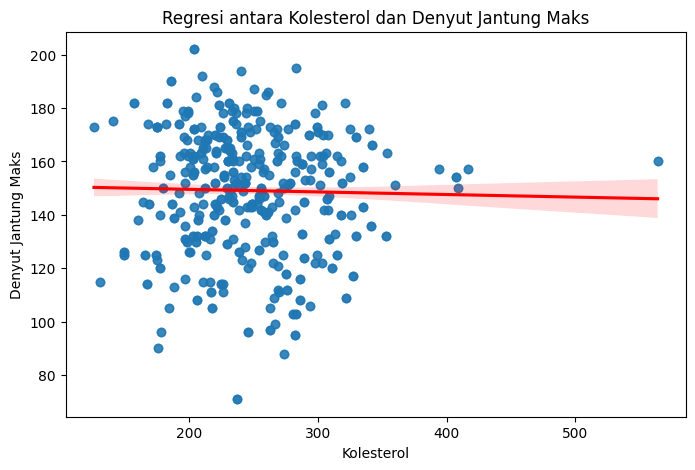

In [47]:
# Korelasi & Causation dengan Regplot
plt.figure(figsize=(8,5))
sns.regplot(x='chol', y='thalach', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regresi antara Kolesterol dan Denyut Jantung Maks")
plt.xlabel("Kolesterol")
plt.ylabel("Denyut Jantung Maks")
plt.show()

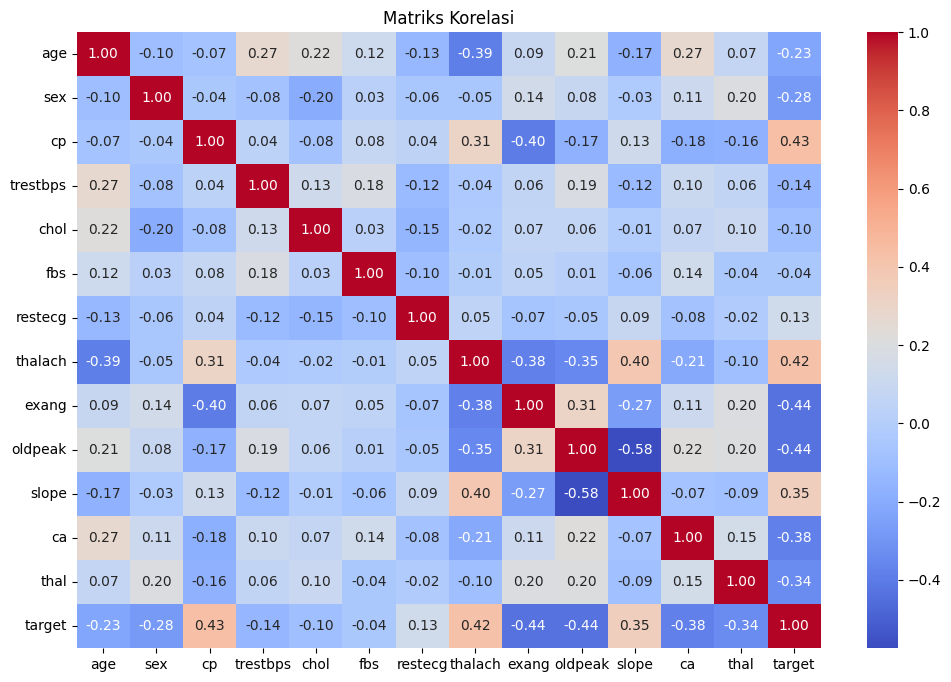

In [48]:
# Heatmap Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

In [49]:
# P-value antara Kolesterol dan Denyut Jantung Maks
correlation, p_value = stats.pearsonr(df['chol'], df['thalach'])
print(f"\nKorelasi antara Kolesterol dan Denyut Jantung Maks: {correlation:.2f}")
print(f"P-Value: {p_value:.5f}")


Korelasi antara Kolesterol dan Denyut Jantung Maks: -0.02
P-Value: 0.48625


<ipython-input-50-8b08ab71bdad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set2')


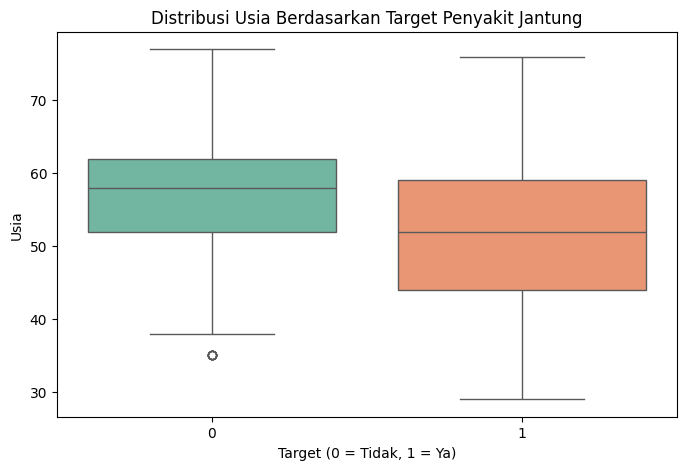

In [50]:
# Boxplot untuk Kategori Variabel Statistik
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='age', data=df, palette='Set2')
plt.title("Distribusi Usia Berdasarkan Target Penyakit Jantung")
plt.xlabel("Target (0 = Tidak, 1 = Ya)")
plt.ylabel("Usia")
plt.show()

In [51]:
# Grouping: Rata-rata umur berdasarkan target
print("\nRata-rata umur berdasarkan target:")
print(df.groupby('target')['age'].mean())


Rata-rata umur berdasarkan target:
target
0    56.569138
1    52.408745
Name: age, dtype: float64


In [52]:
# ANOVA untuk membandingkan usia berdasarkan target penyakit jantung
anova_result = stats.f_oneway(df[df['target'] == 0]['age'], df[df['target'] == 1]['age'])
print("\nHasil ANOVA antara Usia dan Target Penyakit Jantung:")
print(f"F-statistik: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.5f}")


Hasil ANOVA antara Usia dan Target Penyakit Jantung:
F-statistik: 56.79, p-value: 0.00000
